<a href="https://colab.research.google.com/github/Kei-Kobayash/ATR_faces_rating/blob/main/ATR_face_rating_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#import data
df_original = pd.read_csv("ATR_face_rating_data_happy2023.csv")
df_original.head()

,Expression,Exp,ave : Happy,ave : Sad,ave : Surprise,ave : Anger,ave : Disgust,ave : Fear,ave : Contempt,SD : Happy,SD : Sad,SD : Surprise,SD : Anger,SD : Disgust,SD : Fear,SD : Contempt
0,F03-AC-1,AC,1.074,1.778,1.889,6.444,4.222,1.593,3.741,0.262,1.100,1.315,0.685,2.233,1.028,2.153
1,F03-AC-2,AC,1.333,2.000,1.815,5.926,3.852,1.556,3.037,0.981,1.155,1.156,1.016,1.799,0.875,2.009
2,F03-AC-3,AC,1.556,1.778,1.630,5.519,3.667,1.481,2.370,1.197,1.343,1.024,1.572,2.177,1.032,1.808
3,F03-AO-1,AO,1.111,1.667,2.333,5.741,4.222,1.889,3.222,0.416,1.388,1.656,1.430,2.061,1.257,2.424
4,F03-AO-2,AO,1.111,1.667,1.519,6.519,3.963,1.556,3.444,0.314,0.943,0.957,0.876,2.442,1.066,2.200


In [ ]:
face_used_original = ["F03-f00-e00-NE-1", "F10-f00-e00-NE-1", "F13-f00-e00-NE-1", "F16-f00-e00-NE-1", "M01-f00-e00-NE-1", "M06-f00-e00-NE-1", "M09-f00-e00-NE-1", "M10-f00-e00-NE-1", "F03-f00-e00-SC-1", "F10-f00-e00-SC-2", "F13-f00-e00-SC-2", "F16-f00-e00-SC-1", "M01-f00-e00-SC-2", "M06-f00-e00-SC-1", "M09-f00-e00-SC-1", "M10-f00-e00-SC-1"]
face_used = [item.replace("-f00-e00", "") for item in face_used_original]
face_used

['F03-NE-1',
 'F10-NE-1',
 'F13-NE-1',
 'F16-NE-1',
 'M01-NE-1',
 'M06-NE-1',
 'M09-NE-1',
 'M10-NE-1',
 'F03-SC-1',
 'F10-SC-2',
 'F13-SC-2',
 'F16-SC-1',
 'M01-SC-2',
 'M06-SC-1',
 'M09-SC-1',
 'M10-SC-1']

In [ ]:
df = df_original[df_original["Expression"].isin(face_used)]
df

,Expression,Exp,ave : Happy,ave : Sad,ave : Surprise,ave : Anger,ave : Disgust,ave : Fear,ave : Contempt,SD : Happy,SD : Sad,SD : Surprise,SD : Anger,SD : Disgust,SD : Fear,SD : Contempt
15,F03-NE-1,NE,2.556,1.667,1.074,1.704,1.630,1.148,1.889,1.812,1.305,0.262,1.356,1.281,0.355,1.523
16,F03-SC-1,SC,5.815,1.407,1.185,1.407,1.296,1.148,1.593,1.156,0.828,0.474,0.828,0.710,0.355,1.225
43,F10-NE-1,NE,2.148,1.889,1.185,1.519,1.667,1.407,1.889,1.238,1.030,0.388,1.134,1.122,0.624,1.595
45,F10-SC-2,SC,6.000,1.185,1.111,1.111,1.037,1.037,1.222,1.054,0.611,0.314,0.416,0.189,0.189,0.685
71,F13-NE-1,NE,2.000,1.630,1.111,1.370,1.333,1.296,1.741,1.540,1.094,0.314,0.909,0.770,0.710,1.322
73,F13-SC-2,SC,5.778,1.370,1.111,1.111,1.185,1.185,1.333,1.343,0.987,0.314,0.314,0.474,0.474,0.609
99,F16-NE-1,NE,1.852,2.407,1.407,1.704,1.778,1.519,1.852,1.208,1.639,1.063,1.048,1.227,1.032,1.268
100,F16-SC-1,SC,5.926,1.481,1.037,1.074,1.111,1.111,1.222,1.152,0.995,0.189,0.262,0.416,0.314,0.786
127,M01-NE-1,NE,1.778,1.889,1.111,1.370,1.444,1.259,1.815,0.994,1.523,0.314,0.777,0.786,0.644,1.467
129,M01-SC-2,SC,6.185,1.296,1.259,1.148,1.222,1.074,1.481,0.772,0.710,0.798,0.355,0.786,0.262,0.918


In [ ]:
df_neutral = df[df["Exp"] == "NE"]
df_neutral

,Expression,Exp,ave : Happy,ave : Sad,ave : Surprise,ave : Anger,ave : Disgust,ave : Fear,ave : Contempt,SD : Happy,SD : Sad,SD : Surprise,SD : Anger,SD : Disgust,SD : Fear,SD : Contempt
15,F03-NE-1,NE,2.556,1.667,1.074,1.704,1.630,1.148,1.889,1.812,1.305,0.262,1.356,1.281,0.355,1.523
43,F10-NE-1,NE,2.148,1.889,1.185,1.519,1.667,1.407,1.889,1.238,1.030,0.388,1.134,1.122,0.624,1.595
71,F13-NE-1,NE,2.000,1.630,1.111,1.370,1.333,1.296,1.741,1.540,1.094,0.314,0.909,0.770,0.710,1.322
99,F16-NE-1,NE,1.852,2.407,1.407,1.704,1.778,1.519,1.852,1.208,1.639,1.063,1.048,1.227,1.032,1.268
127,M01-NE-1,NE,1.778,1.889,1.111,1.370,1.444,1.259,1.815,0.994,1.523,0.314,0.777,0.786,0.644,1.467
211,M06-NE-1,NE,2.037,1.741,1.111,1.519,1.519,1.481,1.741,1.071,1.142,0.314,1.167,1.032,1.134,1.377
239,M09-NE-1,NE,1.926,1.741,1.037,1.333,1.370,1.296,1.593,1.086,1.265,0.189,0.861,1.024,0.853,1.255
267,M10-NE-1,NE,1.481,2.259,1.074,1.519,1.630,1.481,2.037,0.918,1.797,0.378,1.101,1.127,1.344,1.452


In [ ]:
df_smile = df[df["Exp"] == "SC"]
df_smile

,Expression,Exp,ave : Happy,ave : Sad,ave : Surprise,ave : Anger,ave : Disgust,ave : Fear,ave : Contempt,SD : Happy,SD : Sad,SD : Surprise,SD : Anger,SD : Disgust,SD : Fear,SD : Contempt
16,F03-SC-1,SC,5.815,1.407,1.185,1.407,1.296,1.148,1.593,1.156,0.828,0.474,0.828,0.710,0.355,1.225
45,F10-SC-2,SC,6.000,1.185,1.111,1.111,1.037,1.037,1.222,1.054,0.611,0.314,0.416,0.189,0.189,0.685
73,F13-SC-2,SC,5.778,1.370,1.111,1.111,1.185,1.185,1.333,1.343,0.987,0.314,0.314,0.474,0.474,0.609
100,F16-SC-1,SC,5.926,1.481,1.037,1.074,1.111,1.111,1.222,1.152,0.995,0.189,0.262,0.416,0.314,0.786
129,M01-SC-2,SC,6.185,1.296,1.259,1.148,1.222,1.074,1.481,0.772,0.710,0.798,0.355,0.786,0.262,0.918
212,M06-SC-1,SC,6.630,1.296,1.037,1.148,1.074,1.185,1.407,0.554,1.012,0.189,0.590,0.262,0.611,1.097
240,M09-SC-1,SC,6.481,1.259,1.111,1.111,1.222,1.148,1.407,0.739,0.843,0.314,0.416,0.567,0.590,0.782
268,M10-SC-1,SC,5.889,1.852,1.148,1.148,1.222,1.333,1.333,1.257,1.145,0.355,0.590,0.786,0.903,1.018


In [ ]:
df_smile_mean = df_smile.mean()
df_smile_mean

<ipython-input-14-7dbbca095ab0>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_smile_mean = df_smile.mean()


ave : Happy       6.088000
ave : Sad         1.393250
ave : Surprise    1.124875
ave : Anger       1.157250
ave : Disgust     1.171125
ave : Fear        1.152625
ave : Contempt    1.374750
SD : Happy        1.003375
SD : Sad          0.891375
SD : Surprise     0.368375
SD : Anger        0.471375
SD : Disgust      0.523750
SD : Fear         0.462250
SD : Contempt     0.890000
dtype: float64

In [ ]:
df_neutral_mean = df_neutral.mean()
df_neutral_mean

<ipython-input-44-1416f0920db8>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_neutral_mean = df_neutral.mean()


ave : Happy       1.972250
ave : Sad         1.902875
ave : Surprise    1.138750
ave : Anger       1.504750
ave : Disgust     1.546375
ave : Fear        1.360875
ave : Contempt    1.819625
SD : Happy        1.233375
SD : Sad          1.349375
SD : Surprise     0.402750
SD : Anger        1.044125
SD : Disgust      1.046125
SD : Fear         0.837000
SD : Contempt     1.407375
dtype: float64

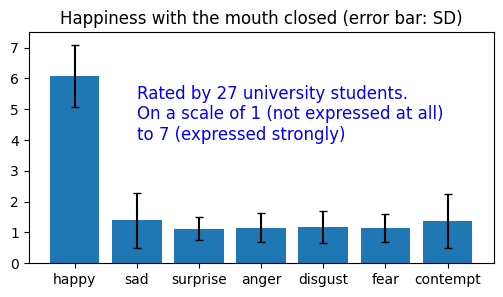

In [ ]:
plt.figure(figsize = (6, 3))

expression = ["happy", "sad", "surprise", "anger", "disgust", "fear", "contempt"]
happy_value = df_smile_mean.tolist()
happy_sd = happy_value[7:15]

happy_value[0:7]
happy_sd

plt.bar(expression, happy_value[0:7], yerr=happy_sd, capsize = 3)
plt.title("Happiness with the mouth closed (error bar: SD)")
plt.text(1, 4, 'Rated by 27 university students. \nOn a scale of 1 (not expressed at all) \nto 7 (expressed strongly)', fontsize=12, color='blue')
plt.ylim(0, 7.5)
plt.savefig("ATR_SC.png", dpi = 500)

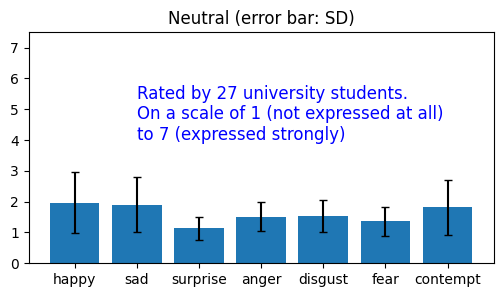

In [ ]:
plt.figure(figsize = (6, 3))

expression = ["happy", "sad", "surprise", "anger", "disgust", "fear", "contempt"]
neutral_value = df_neutral_mean.tolist()
neutral_sd = happy_value[7:15]

neutral_value[0:7]
neutral_sd

plt.bar(expression, neutral_value[0:7], yerr=neutral_sd, capsize = 3)
plt.title("Neutral (error bar: SD)")
plt.text(1, 4, 'Rated by 27 university students. \nOn a scale of 1 (not expressed at all) \nto 7 (expressed strongly)', fontsize=12, color='blue')
plt.ylim(0, 7.5)
plt.savefig("ATR_NE.png", dpi = 500)